In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('housing price.csv')
df.head(6)

Saving housing price.csv to housing price (2).csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('housing price.csv')
df.head()
df.describe
df.isnull().sum()

Saving housing price.csv to housing price (7).csv


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-12-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
# Separate features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Import the Pipeline class


In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# ... (your existing code for data loading and preprocessing) ...

# Create a Linear Regression model
model = LinearRegression() # This line is crucial: it creates the model instance

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 70258.10088868471


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming your dataset is in 'housing price.csv' and you want to name it 'data'
import pandas as pd

data = pd.read_csv('housing price.csv')  # Load the dataset and assign it to 'data'

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Handle missing values (if any)
data = data.dropna()

In [ ]:
# Identify numerical and categorical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()


In [ ]:

# Encode categorical features if they exist
if categorical_features:
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


In [ ]:
# Define target variable and features
y = data['median_house_value']  # Assuming 'median_house_value' is the target column
X = data.drop('median_house_value', axis=1)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature selection using SelectKBest
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)


Selected Features:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [ ]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_selected, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_selected)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Model Evaluation:
Mean Squared Error: 2424445968.718161
R^2 Score: 0.8227119621561741


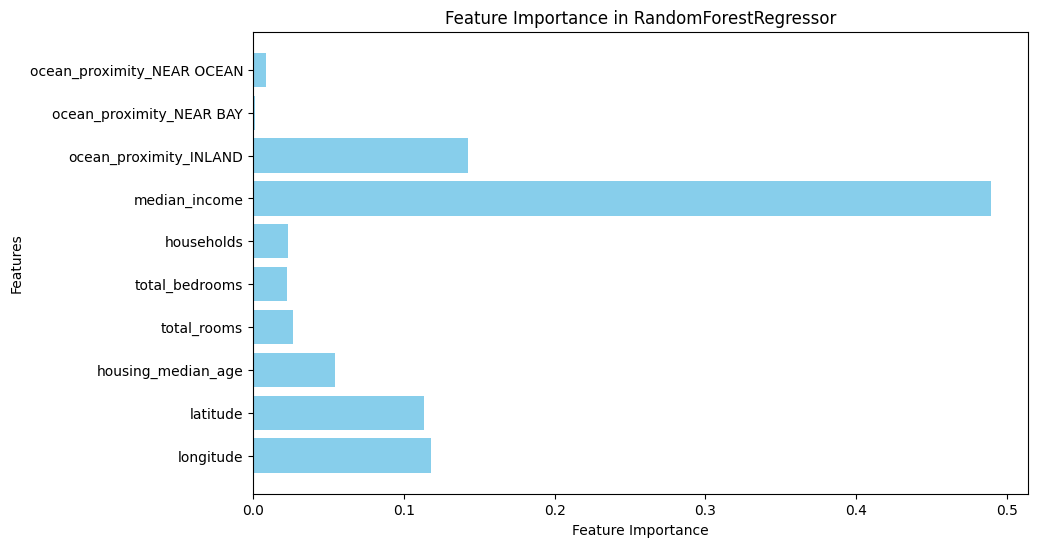

In [ ]:
# Plot feature importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in RandomForestRegressor')
plt.show()

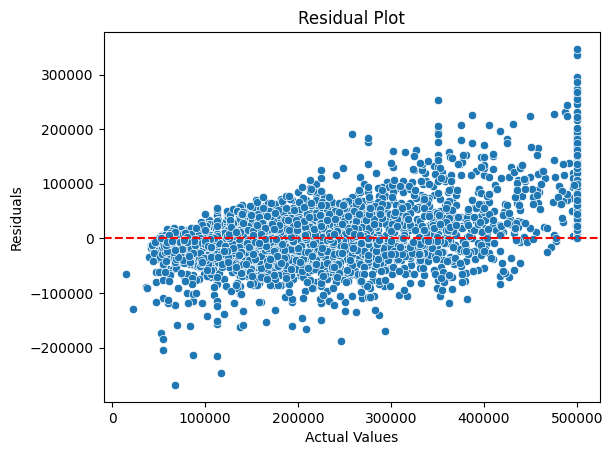

In [ ]:
# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()